**ARTIFICIAL INTELLIGENCE AND DATA SCIENCE II**

**ASSIGNMENT NO: 02**

Develop cognitive application for Retail Industry using Neural Network.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [17]:
data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
# Handle categorical variable 'ProductCategory'
label_encoder = LabelEncoder()
data['ProductCategory'] = label_encoder.fit_transform(data['Product Category'])

In [20]:
# Convert categorical columns to numerical values using LabelEncoder
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

label_encoder_product = LabelEncoder()
data['Product Category'] = label_encoder_product.fit_transform(data['Product Category'])

In [21]:
# Split the data into features and target variable
# Let's predict 'PurchaseAmount'
X = data.drop(['Total Amount', 'Customer ID','Date'], axis=1)  # Features
y = data['Total Amount']  # Target variable

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 545699.8750 - mae: 469.4456 - val_loss: 631592.6875 - val_mae: 491.6630
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 521198.2500 - mae: 463.2390 - val_loss: 619295.1875 - val_mae: 482.7722
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 411631.7500 - mae: 400.4649 - val_loss: 583098.3125 - val_mae: 459.0177
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 457446.1250 - mae: 408.8614 - val_loss: 507959.0938 - val_mae: 414.5519
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367199.0938 - mae: 351.6355 - val_loss: 401934.6250 - val_mae: 364.0940
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 273906.0312 - mae: 308.3737 - val_loss: 278772.4688 - val_mae: 317.2197
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 191438.1719 - mae: 273.4565 - val_loss: 175168.9688 - val_mae: 269.7317
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 113518.7578 - mae: 232.1

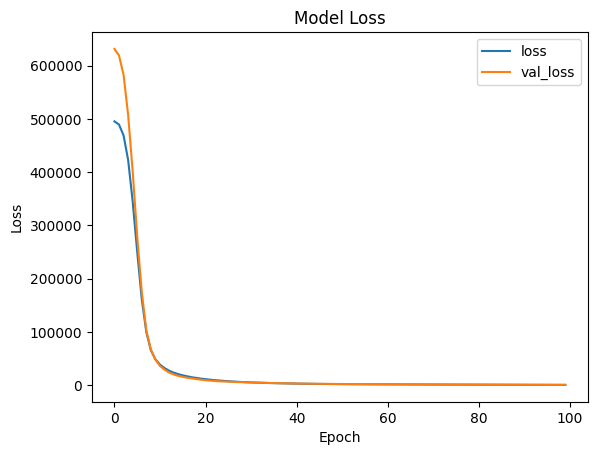

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Step 5: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.4f}")

# Step 6: Plotting Training History
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [24]:
# Step 6: Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Absolute Percentage Error (MAPE): 399.07%


Developing a cognitive application for a retail sales dataset using a neural network demonstrates the potential of machine learning in enhancing decision-making processes within the retail industry. By utilizing neural networks to analyze various customer features, such as age, salary, gender, and product category, the model can effectively predict purchase amounts, leading to more accurate sales forecasts and targeted marketing strategies. The implementation not only showcases the capability of neural networks in handling regression tasks but also emphasizes the importance of data preprocessing and feature engineering in improving model performance. As retailers increasingly rely on data-driven insights, such cognitive applications can provide significant advantages in optimizing inventory management, personalizing customer experiences, and ultimately driving sales growth. The findings underscore the necessity for continuous refinement of models and methodologies to adapt to evolving market trends and consumer behaviors, ensuring that businesses remain competitive in a rapidly changing landscape.